# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: 315998971, Roy Shlomo Chen

# Details Student 2: 318911161, Omer Sruia
print("Details Student 1: 315998971, Roy Shlomo Chen\nDetails Student 2: 318911161, Omer Sruia")

Details Student 1: 315998971, Roy Shlomo Chen
Details Student 2: 318911161, Omer Sruia


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn import set_config
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [8]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\roych\OneDrive\שולחן העבודה\Text Anylsis 2\assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [9]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [10]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [11]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

<font face="Cooper Black" size=7 color='#CDB79E'>Pre-processing</font>    


<font face="Tahoma bolt" size=3 color='#00000'>This function takes Hebrew text as input, tokenizes it, </font>    
<font face="Tahoma bolt" size=3 color='#00000'>and extracts Hebrew tokens, creating a list of those tokens for further use. </font>    
<font face="Tahoma bolt" size=3 color='#00000'>delete unnecessery numeric,punctioation and extra spaces tabs. </font>    


In [12]:
def tokenized(hebText):
    token = ht.tokenize(hebText)
    tok_list = list(filter(lambda x: (x[0] == 'HEBREW'),token))
    tok_list = [tuple[1] for tuple in tok_list]
    tok_list
    return tok_list



<font face="Tahoma bolt" size=3 color='#00000'>Divide the train seperate frames , 'story' and the 'gender' ( so it will be the target ) </font>    
<font face="Tahoma bolt" size=3 color='#00000'>The target feture 'gender' will change from categorial type to numeric.  </font>    


In [13]:
X_train = df_train["story"]
y_train = df_train["gender"].replace({'m': 1, 'f': 0})

In [14]:
print("First 5 rows from the feture 'story'")
X_train.head(5)
print()
print("First 5 rows from the feture 'gender' whice convert to numeric\n'1' for male, '0' for female")
y_train.head(5)

First 5 rows from the feture 'story'


0    כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...
1    לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...
2    מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...
3    כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...
4    ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...
Name: story, dtype: object


First 5 rows from the feture 'gender' whice convert to numeric
'1' for male, '0' for female


0    1
1    1
2    0
3    1
4    0
Name: gender, dtype: int64

<font face="Cooper Black" size=7 color='#CDB79E'>Cross Validation</font>    


<font face="Tahoma bolt" size=3 color='#00000'>Sets the grid search parameters for each classifier based on its name. set defaults Hyperparameters and later i'll change them if it's necessary.</font>    


In [15]:
models = [
    ('Perceptron', Perceptron()),
    ('LinearSVC', LinearSVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('SGDClassifier', SGDClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]



<font face="Tahoma bolt" size=3 color='#00000'>Initial hyperparameters are placed for each model,</font>    
<font face="Tahoma bolt" size=3 color='#00000'>Some of them we chose randomly or by reading about them on the </font> <font face="Tahoma bolt" size=3 color='#00000'>Internet, some are default values that the system provides,</font> 
<font face="Tahoma bolt" size=3 color='#00000'>And there are also those who express trial and error.</font>    


In [16]:
def set_params():
    if name == 'LinearSVC':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9],'model__C': [0.1, 1, 10],
                      'model__penalty': ['l1', 'l2']}

    elif name == 'Perceptron':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9],'tfidf__sublinear_tf':[True, False],
                    'model__alpha': [0.000001, 0.00001, 0.0001], 'model__penalty': ['l2', 'l1']}

  
    elif name == 'DecisionTreeClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__max_depth': [5, 10, 15],
                      'model__min_samples_leaf': [5, 10, 15]}

    
    elif name == 'MultinomialNB':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__alpha': [0.01, 0.1, 1]}

   
    elif name == 'SGDClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__alpha': [1e-3, 1e-4],
                      'model__penalty': ['l1', 'l2']}

    elif name == 'KNeighborsClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5], 
                      'tfidf__max_df': [0.8, 0.9], 'model__n_neighbors': [3, 5, 7],
                      'model__metric': ['euclidean', 'manhattan', 'chebyshev'],
                      'model__leaf_size': [10, 20, 30]}
    return parameters

<font face="Tahoma bolt" size=3 color='#00000'>• Now I will intial the pipline for each model. </font>    
<font face="Tahoma bolt" size=3 color='#00000'>• GridSearch parameters setting ( using the set_parameters func ). </font>    
<font face="Tahoma bolt" size=3 color='#00000'>• Print the best score and the estimator for each model. </font>    
<font face="Tahoma bolt" size=3 color='#00000'>• Than I will continue with the best model/s I will found. </font>  

<font face="Tahoma bolt" size=3 color='#00000'> Notice : The GridSearch visualization displayed badly in GitHub </font>  
<font face="Tahoma bolt" size=3 color='#00000'> If you want to look at them, I recomending to open it in Google Colab </font>  

                                 


In [17]:
for name, model in models:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('norm', preprocessing.Normalizer()),
        ('model', model)
    ])

    params = set_params()
     
    set_config(display='diagram')      
                                         
                      
    grid = GridSearchCV(pipeline, params, scoring=make_scorer(f1_score, average='macro'), cv=10)
    grid.fit(X_train, y_train)

    print("The best score of the model is: ", round(grid.best_score_, 3))
    print("The best estimator of the model is: ", grid.best_estimator_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', Perceptron())]),
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001],
                         'model__penalty': ['l2', 'l1'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__sublinear_tf': [True, False]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.726
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model', Perceptron(alpha=1e-06, penalty='l1'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.687
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()), ('model', LinearSVC(C=10))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__min_samples_leaf': [5, 10, 15],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.648
The best estimator of the model is:  Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, min_df=4)),
                ('norm', Normalizer()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=15))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': [0.01, 0.1, 1],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.526
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()), ('model', MultinomialNB(alpha=0.01))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', SGDClassifier())]),
             param_grid={'model__alpha': [0.001, 0.0001],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.713
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model', SGDClassifier(penalty='l1'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [10, 20, 30],
                         'model__metric': ['euclidean', 'manhattan',
                                           'chebyshev'],
                         'model__n_neighbors': [3, 5, 7],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

The best score of the model is:  0.613
The best estimator of the model is:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model',
                 KNeighborsClassifier(leaf_size=10, metric='euclidean'))])


<font face="Tahoma bolt" size=3 color='#00000'> GitHub does not support well in grid search </font>  
<font face="Tahoma bolt" size=3 color='#00000'> Bellow there is some screen shoots from the jupyter nootbook of the GridSearch's results </font>  

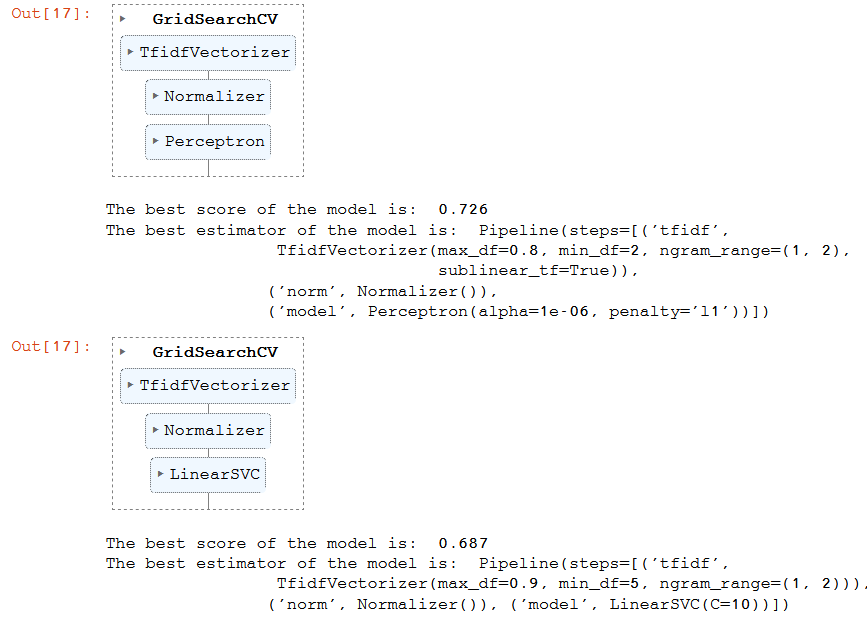


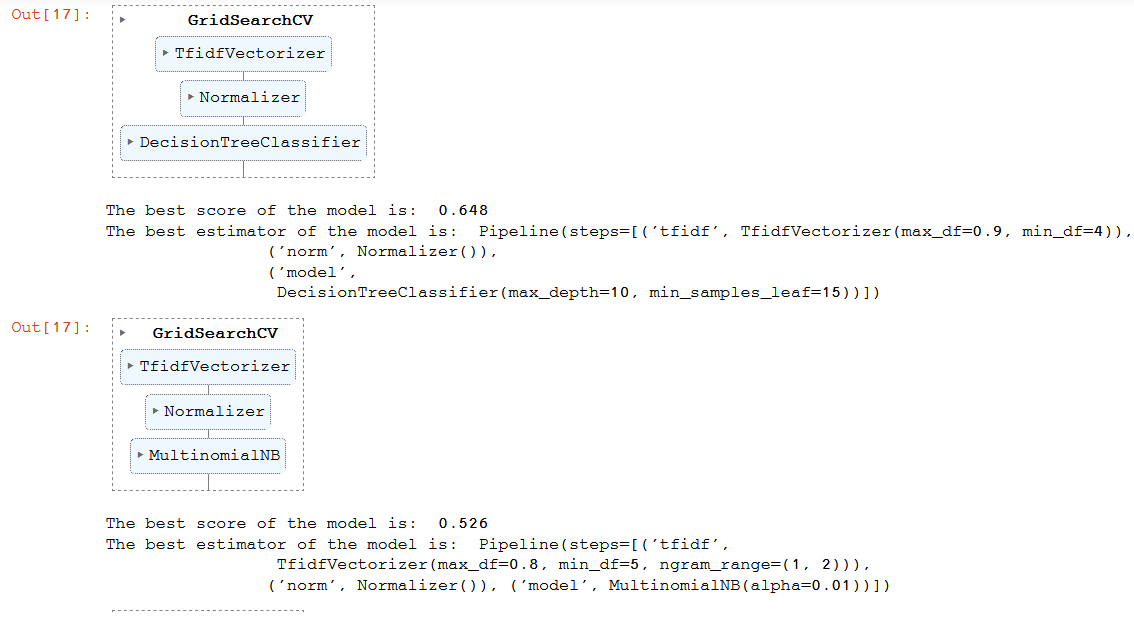

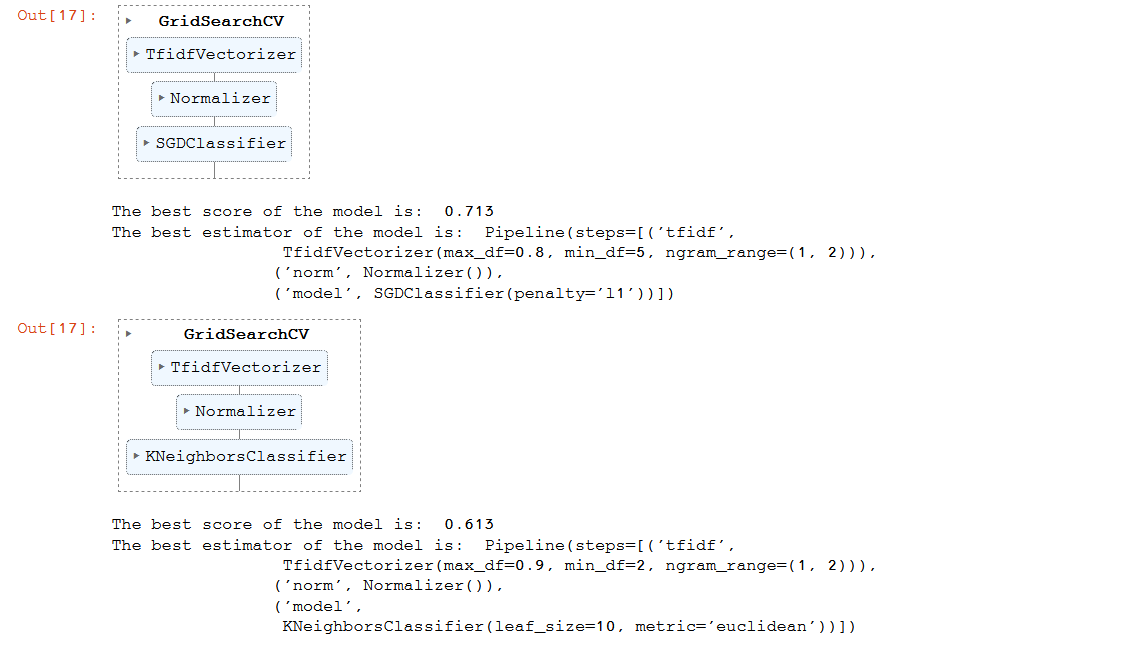

<Figure size 720x432 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'F1 Score')

Text(0.5, 1.0, 'F1 Scores for Different Models')

(0.0, 1.1)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 10, '0.726')

Text(0, 10, '0.687')

Text(0, 10, '0.648')

Text(0, 10, '0.526')

Text(0, 10, '0.713')

Text(0, 10, '0.613')

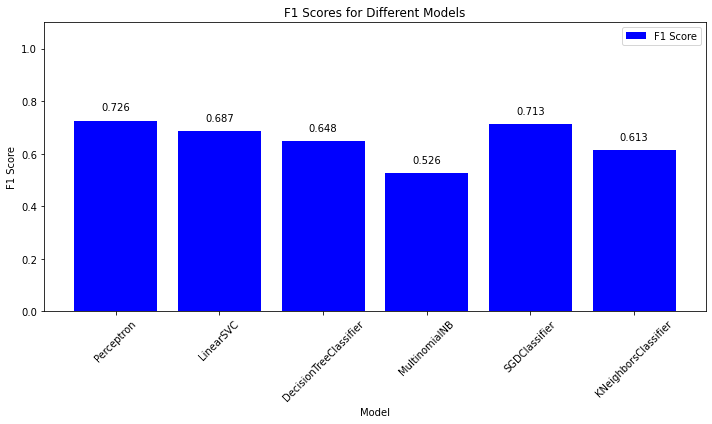

In [22]:
f1_scores = {
    'Perceptron': 0.726,
    'LinearSVC': 0.687,
    'DecisionTreeClassifier': 0.648,
    'MultinomialNB': 0.526,
    'SGDClassifier': 0.713,
    'KNeighborsClassifier': 0.613
}

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_values, color='blue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)

for i, (model, score) in enumerate(f1_scores.items()):
    plt.annotate(f'{score:.3f}', (i, score), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# This is for the notice in the upper right corner that signs the best models ( we chose above 0.7 ) will color
# by the color green.
plt.legend(["F1 Score"], loc="upper right")

plt.show()


<Figure size 720x432 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'F1 Score')

Text(0.5, 1.0, 'F1 Scores for Different Models')

(0.0, 1.1)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 10, '0.726')

Text(0, 10, '0.687')

Text(0, 10, '0.648')

Text(0, 10, '0.526')

Text(0, 10, '0.713')

Text(0, 10, '0.613')

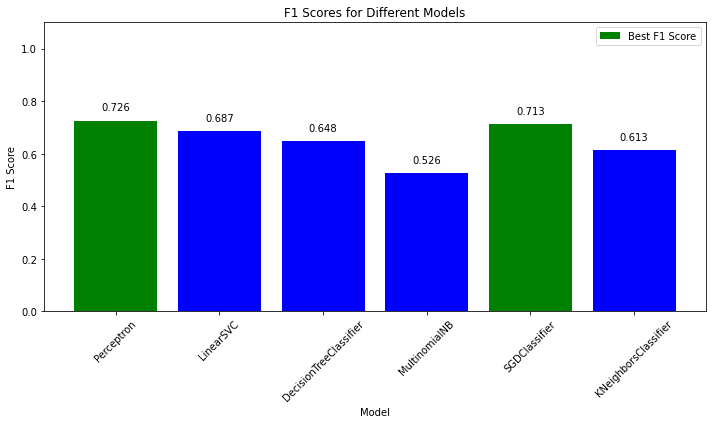

In [28]:
import matplotlib.pyplot as plt

# Replace these with your actual F1 scores
f1_scores = {
    'Perceptron': 0.726,
    'LinearSVC': 0.687,
    'DecisionTreeClassifier': 0.648,
    'MultinomialNB': 0.526,
    'SGDClassifier': 0.713,
    'KNeighborsClassifier': 0.613
}

# Sort models by F1 scores in descending order
sorted_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

# Get names and scores of the two models with the highest scores
top_models = sorted_models[:2]
top_model_names = [model[0] for model in top_models]
top_model_scores = [model[1] for model in top_models]

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))

# Set bar colors
colors = ['green' if model in top_model_names else 'blue' for model in model_names]

plt.bar(model_names, f1_values, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)

# Add annotations for each model
for i, (model, score) in enumerate(f1_scores.items()):
    plt.annotate(f'{score:.3f}', (i, score), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()

# Add legend in the right upper corner
plt.legend(["Best F1 Score"], loc="upper right")

plt.show()


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)